Number of anomalies detected: 63612
     step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
359     1  TRANSFER  3.712322   C106297322      -0.288716       -0.292442   
362     1  TRANSFER  2.115317   C396918327      -0.288716       -0.292442   
375     1  TRANSFER  3.917503  C1057507014      -0.288716       -0.292442   
376     1  TRANSFER  3.115336  C2007599722      -0.288716       -0.292442   
432     1   CASH_IN  0.280933   C173791568       2.249241        2.333966   

        nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  \
359  C1590550415        2.181392        4.883936        0               0   
362  C1590550415        2.893793        4.883936        0               0   
375  C1590550415        3.322488        4.883936        0               0   
376  C1590550415        4.071339        4.883936        0               0   
432  C1590550415        4.677686        4.883936        0               0   

     type_encoded  anomaly  
359      

c:\Users\Admin\miniconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


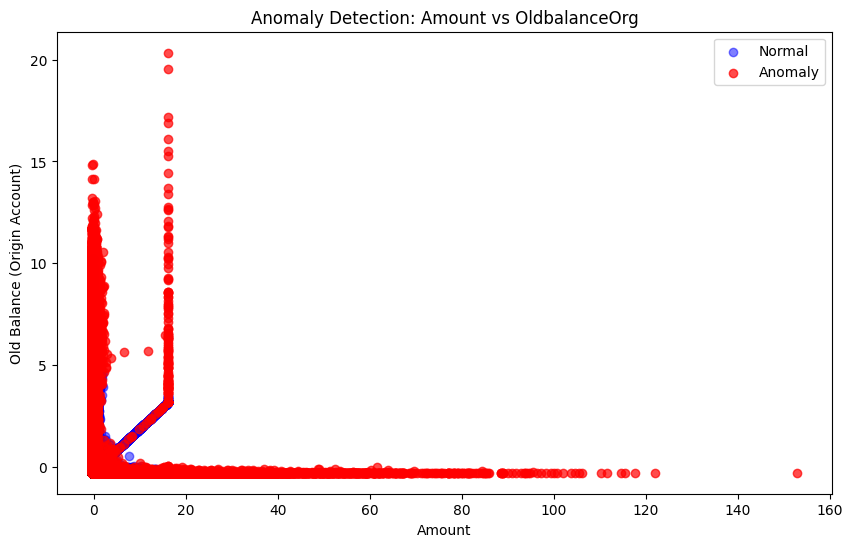

In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
data_df = pd.read_csv(r'E:\NIKHIL\ML\Cobblestone proj\data\preprocessed data\processed_Synthetic_Financial_datasets_log.csv')

# Label encode the 'type' column (e.g., PAYMENT, TRANSFER, etc.)
le = LabelEncoder()
data_df['type_encoded'] = le.fit_transform(data_df['type'])

# Select relevant features for anomaly detection
features = ['type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Standardize the data
scaler = StandardScaler()
data_df[features] = scaler.fit_transform(data_df[features])

# Train the Isolation Forest on the selected features
iso_forest = IsolationForest(n_estimators=100,   # Number of base estimators (trees)
                             contamination=0.01, # Proportion of outliers in the data
                             max_samples='auto', # Subsampling for efficiency
                             random_state=42)    # Seed for reproducibility

iso_forest.fit(data_df[features])

# Predict anomalies (-1 means anomaly, 1 means normal)
data_df['anomaly'] = iso_forest.predict(data_df[features])

# Filter and display the detected anomalies
anomalies = data_df[data_df['anomaly'] == -1]

print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())

# Save the results for future analysis
anomalies.to_csv('detected_anomalies.csv', index=False)
print("Anomalies have been saved to 'detected_anomalies.csv'.")

# Visualization
plt.figure(figsize=(10, 6))

# Plot normal data points (non-anomalies)
plt.scatter(data_df[data_df['anomaly'] == 1]['amount'], data_df[data_df['anomaly'] == 1]['oldbalanceOrg'], 
            c='blue', label='Normal', alpha=0.5)

# Plot anomalies
plt.scatter(anomalies['amount'], anomalies['oldbalanceOrg'], 
            c='red', label='Anomaly', alpha=0.7)

# Add labels and title
plt.title('Anomaly Detection: Amount vs OldbalanceOrg')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Origin Account)')
plt.legend()

# Show the plot
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
data_df = pd.read_csv(r'E:\NIKHIL\ML\Cobblestone proj\data\Synthetic_Financial_datasets_log.csv')

# Label encode the 'type' column (e.g., PAYMENT, TRANSFER, etc.)
le = LabelEncoder()
data_df['type_encoded'] = le.fit_transform(data_df['type'])

# Select relevant features for anomaly detection
features = ['type_encoded', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']

# Standardize the data
scaler = StandardScaler()
data_df[features] = scaler.fit_transform(data_df[features])

# Train the Isolation Forest on the selected features
iso_forest = IsolationForest(n_estimators=100,   # Number of base estimators (trees)
                             contamination=0.01, # Proportion of outliers in the data
                             max_samples='auto', # Subsampling for efficiency
                             random_state=42)    # Seed for reproducibility

iso_forest.fit(data_df[features])

# Predict anomalies (-1 means anomaly, 1 means normal)
data_df['anomaly'] = iso_forest.predict(data_df[features])

# Filter and display the detected anomalies
anomalies = data_df[data_df['anomaly'] == -1]

print(f"Number of anomalies detected: {len(anomalies)}")
print(anomalies.head())

# Save the results for future analysis
anomalies.to_csv('detected_anomalies.csv', index=False)
print("Anomalies have been saved to 'detected_anomalies.csv'.")

# Visualization
plt.figure(figsize=(10, 6))

# Plot normal data points (non-anomalies)
plt.scatter(data_df[data_df['anomaly'] == 1]['amount'], data_df[data_df['anomaly'] == 1]['oldbalanceOrg'], 
            c='blue', label='Normal', alpha=0.5)

# Plot anomalies
plt.scatter(anomalies['amount'], anomalies['oldbalanceOrg'], 
            c='red', label='Anomaly', alpha=0.7)

# Add labels and title
plt.title('Anomaly Detection: Amount vs OldbalanceOrg')
plt.xlabel('Amount')
plt.ylabel('Old Balance (Origin Account)')
plt.legend()

# Show the plot
plt.show()
